NOTE: When referencing episodes of the show, shorthand may be used (e.g., S3E7 is Season 3 Episode 7).

# How Does Hurley Correlate with Episode Score?

Now we arrive at the part of the project that inspired this whole thing: checking the correlation between Hurley's wordcount and the IMDb rating of an episode. First, we borrow some code from the `Top Five Talkers Over Time` notebook.

In [39]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import math

In [12]:
# HURLEY 

episode_counter = 0
eps_per_season = [24,23,22,13,16]
hurley_wc = pd.DataFrame()

for season in range(1,6): #need a separate case for season 6
    for ep_num in range(1,eps_per_season[season-1]+1):
        episode_table = pd.read_csv("../Word Count Tables/Season "+str(season)+'/S'+str(season)+'E'+str(ep_num)+'.csv')
        episode_counter += 1
        if episode_table[episode_table['Character']=='HURLEY'].empty:
            hurley_wc = pd.concat([hurley_wc, pd.DataFrame({'Character': ['HURLEY'], 'Word Count': [0]})], axis=0)
        else:
            hurley_wc = pd.concat([hurley_wc, episode_table[episode_table['Character']=='HURLEY']], axis=0)

episode_table = pd.read_csv("../Word Count Tables/Season 6/S6E1.csv")
episode_counter += 1
if episode_table[episode_table['Character']=='HURLEY'].empty:
    hurley_wc = pd.concat([hurley_wc, pd.DataFrame({'Character': ['HURLEY'], 'Word Count': [0]})], axis=0)
else:
    hurley_wc = pd.concat([hurley_wc, episode_table[episode_table['Character']=='HURLEY']], axis=0)

season = 6
for ep_num in range(3,18):
    episode_table = pd.read_csv("../Word Count Tables/Season "+str(season)+'/S'+str(season)+'E'+str(ep_num)+'.csv')
    episode_counter += 1
    if episode_table[episode_table['Character']=='HURLEY'].empty:
        hurley_wc = pd.concat([hurley_wc, pd.DataFrame({'Character': ['HURLEY'], 'Word Count': [0]})], axis=0)
    else:
        hurley_wc = pd.concat([hurley_wc, episode_table[episode_table['Character']=='HURLEY']], axis=0)
hurley_wc['Episode'] = range(1,115)

In [13]:
scores = pd.read_csv('../LOST_IMDb_Ratings.csv')

In [19]:
hurley_list = list(hurley_wc['Word Count'])

In [20]:
scores.head()

,Unnamed: 0,S1,S2,S3,S4,S5,S6
0,E1,9.1,9.1,8.5,8.7,8.7,8.6
1,E2,9.1,8.3,7.9,8.6,8.1,8.3
2,E3,8.3,8.7,7.8,8.3,8.4,7.5
3,E4,9.0,8.2,8.2,8.0,8.2,8.2
4,E5,8.3,7.7,8.0,9.7,8.6,7.9


In [64]:
scores_list = []
for n in range(1,7):
    scores_list.extend([x for x in list(scores['S'+str(n)]) if not math.isnan(x)][:-1])
del scores_list[-16] # S6 premiere part 2

In [65]:
print(len(hurley_list))
print(len(scores_list))

114
114


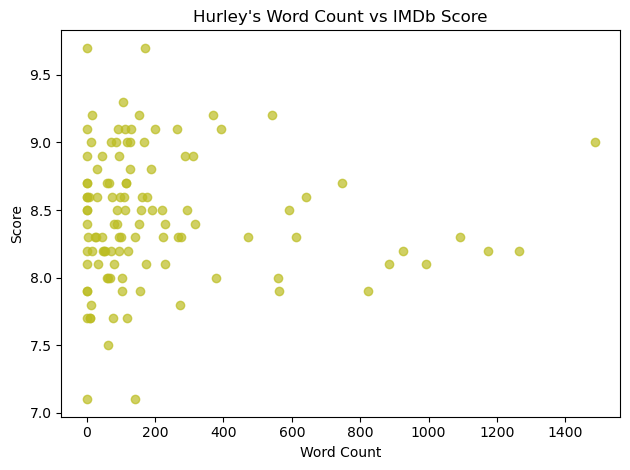

In [69]:
plt.scatter(hurley_list,scores_list, alpha=0.7, color='tab:olive')

plt.title("Hurley's Word Count vs IMDb Score")
plt.xlabel("Word Count")
plt.ylabel("Score")
plt.tight_layout()
#plt.savefig('hurley_vs_scores.png')
plt.show()